In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env as e
import wrangle as w
from scipy.stats import spearmanr
import random
import explore_regression as e
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [3]:
df = w.wrangle_zillow()

this file exists, reading from csv


In [4]:
df.sample(5)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2037094,2,1.0,996,81653,1940,1051.17,6037
1207326,3,2.0,1510,149196,1953,1849.75,6037
1418501,4,2.0,1317,58035,1960,1164.86,6059
2037386,4,2.0,2280,867305,1950,9738.16,6037
845330,3,2.0,1108,484000,1955,5670.77,6037


In [5]:
df = w.prep_zillow(df)

In [6]:
train, val, test = w.splitting_data(df)

In [34]:
X_train, X_test = train[['bedrooms', 'bathrooms']], test[['bedrooms', 'bathrooms']]
y_train, y_test = train.county, test.county

In [35]:
# model steps for KNN?
#make it
model = KNeighborsClassifier(n_neighbors=5)
#fit the model
model.fit(X_train, y_train)
#use it
model.score(X_test, y_test)

0.7425422909166517

In [36]:
# now with scaling!
#make it
scaler = MinMaxScaler()

#for train on this type of preprocessor, we have a fit_transform
X_train_scaled = scaler.fit_transform(X_train) #does both a fit and a transform for you instead of doing two steps

X_test_scaled = scaler.transform(X_test)

In [37]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [38]:
# make sure that you used scaled data consistently:
# we refit on scaled info, if we do model.score(X_test, y_test) the model does poorly
model.score(X_test_scaled, y_test)

0.6286342387635002

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


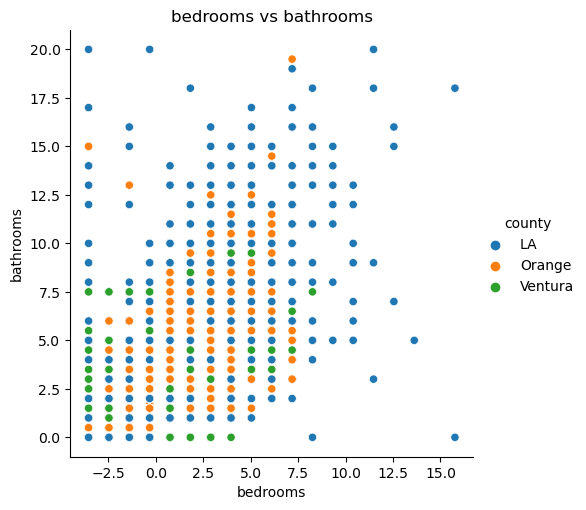

In [39]:
# plot it regular
sns.relplot(data = train, x='bedrooms', y='bathrooms', hue='county')
plt.title('bedrooms vs bathrooms')
plt.show()

In [40]:
X_train_inverse = scaler.inverse_transform(X_train_scaled)
X_test_inverse = scaler.inverse_transform(X_test_scaled)

In [41]:
model.fit(X_train_inverse, y_train)

KNeighborsClassifier()

In [42]:
model.score(X_test_inverse, y_test)

0.7411125413798018

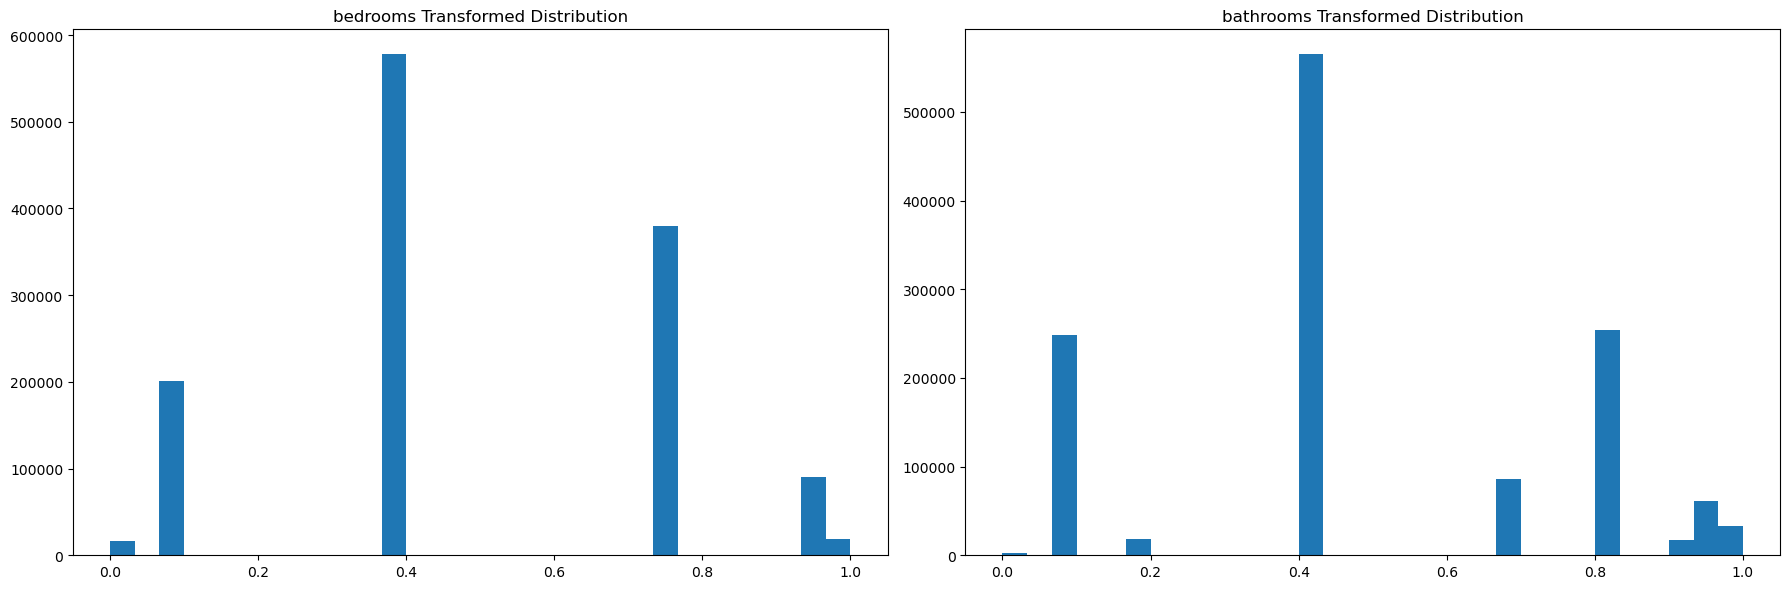

In [54]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'columns' are the columns you want to transform
quantile_transformer = QuantileTransformer(output_distribution='uniform')
transformed_data = quantile_transformer.fit_transform(X_train_scaled)


columns = ['bedrooms', 'bathrooms']  # Replace with your actual column names

# Visualizing the transformed data
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(18, 6))
for i, col in enumerate(columns):
    axes[i].hist(transformed_data[:, i], bins=30)
    axes[i].set_title(f'{col} Transformed Distribution')
plt.tight_layout()
plt.show()


0.18866205215454102


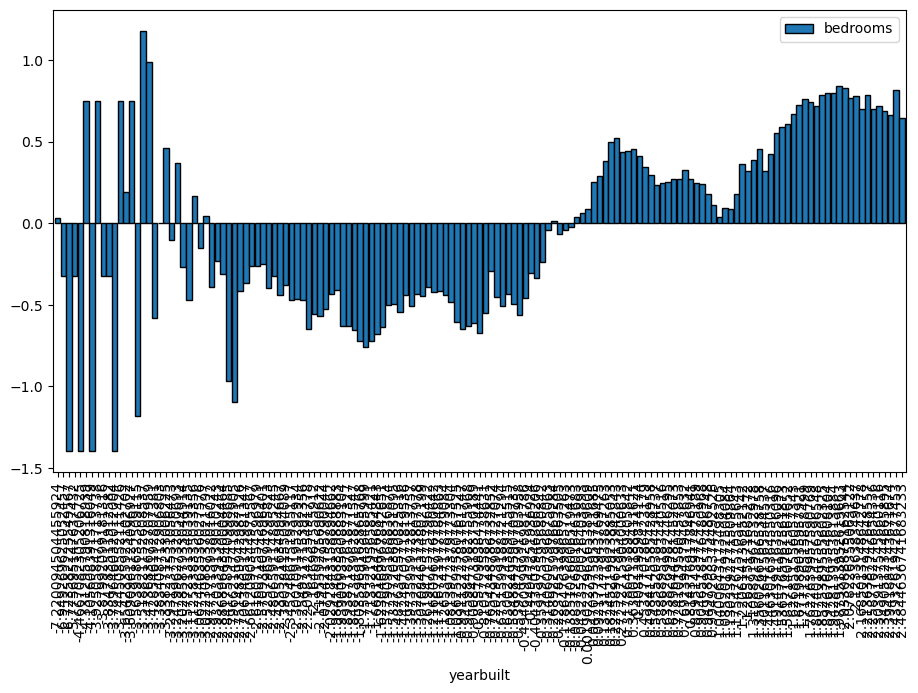

In [20]:
time_beginning = time.time()
from sklearn.preprocessing import StandardScaler, RobustScaler

cols = ['bedrooms', 'yearbuilt']
scaler = StandardScaler()
train[cols] = scaler.fit_transform(train[cols])
train[['bedrooms', 'yearbuilt']].groupby('yearbuilt').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)
time_after = time.time()
time_taken = time_after-time_beginning
print(time_taken)

In [21]:
scaler = MinMaxScaler()
scaler.fit_transform(train[['bedrooms']])

array([[0.16666667],
       [0.11111111],
       [0.11111111],
       ...,
       [0.22222222],
       [0.22222222],
       [0.22222222]])

In [23]:
# create 3 different scalers, 
# transform the original versions of the columns:
# ['x1', 'x2']
# pop those numpy values from the transformations into new columns:
# that are labeled appropriately
scaler = MinMaxScaler()
train[['bedrooma_minmax', 'yearbuilt_minmax']] = scaler.fit_transform(train[['bedrooms', 'yearbuilt']])

scaler = StandardScaler()
train[['bedrooms_standard', 'yearbuilt_standard']] = scaler.fit_transform(train[['bedrooms', 'yearbuilt']])

scaler = RobustScaler()
train[['bedrooms_robust', 'yearbuilt_robust']] = scaler.fit_transform(train[['bedrooms', 'yearbuilt']])

In [24]:
train[sorted(train)] # sort columns alphabetically

,area,bathrooms,bedrooma_minmax,bedrooms,bedrooms_robust,bedrooms_standard,county,salesamount,taxamount,yearbuilt,yearbuilt_minmax,yearbuilt_robust,yearbuilt_standard
760406,1072,1.0,0.166667,-0.322260,0.0,-0.322260,LA,155970,2113.31,-2.525797,0.483721,-1.962963,-2.525797
1702166,805,1.0,0.111111,-1.394623,-1.0,-1.394623,LA,401070,4902.50,-0.945985,0.646512,-0.666667,-0.945985
2124078,2547,3.0,0.111111,-1.394623,-1.0,-1.394623,LA,573594,7345.21,-0.584885,0.683721,-0.370370,-0.584885
627151,1036,1.0,0.111111,-1.394623,-1.0,-1.394623,LA,268690,3304.14,-1.713322,0.567442,-1.296296,-1.713322
718907,1271,2.0,0.166667,-0.322260,0.0,-0.322260,Orange,336563,4101.98,0.047040,0.748837,0.148148,0.047040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455487,1703,2.0,0.166667,-0.322260,0.0,-0.322260,LA,132714,1651.50,-0.900847,0.651163,-0.629630,-0.900847
519570,2028,2.0,0.222222,0.750103,1.0,0.750103,LA,398404,4751.98,-0.223785,0.720930,-0.074074,-0.223785
1267043,2208,2.0,0.222222,0.750103,1.0,0.750103,LA,91705,1587.90,0.047040,0.748837,0.148148,0.047040
2110421,1551,2.5,0.222222,0.750103,1.0,0.750103,Ventura,332566,3575.04,0.182452,0.762791,0.259259,0.182452


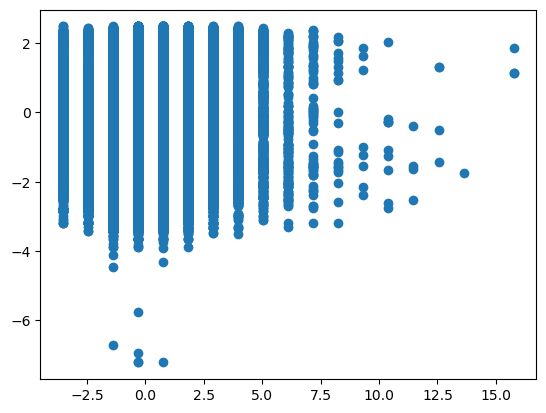

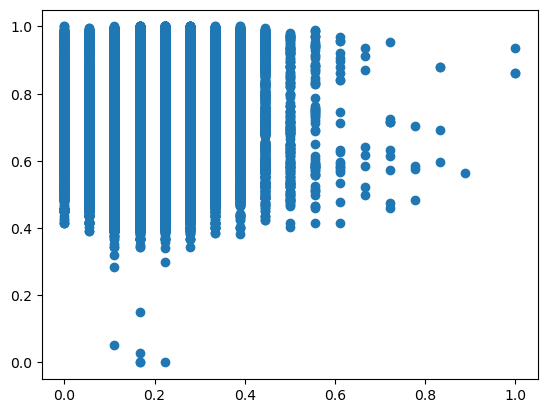

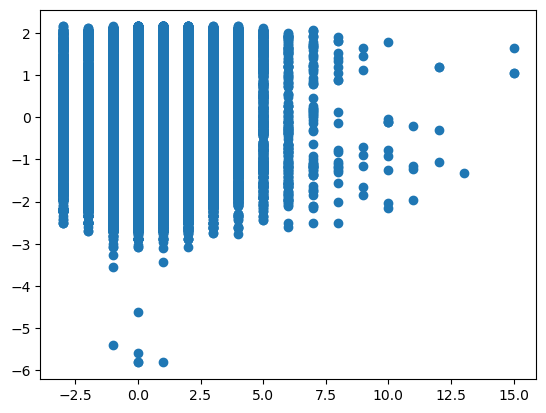

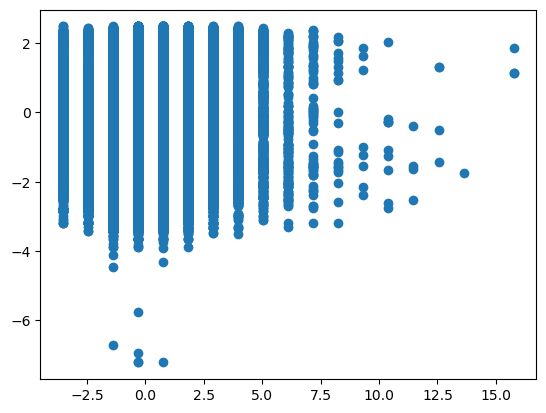

In [28]:
print(plt.scatter(train.bedrooms, train.yearbuilt))
plt.show()
print(plt.scatter(train.bedrooma_minmax, train.yearbuilt_minmax))
plt.show()
print(plt.scatter(train.bedrooms_robust, train.yearbuilt_robust))
plt.show()
print(plt.scatter(train.bedrooms_standard, train.yearbuilt_standard))
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)

# Inverse transform to get back the original data
original_data = scaler.inverse_transform(scaled_data)


ValueError: could not convert string to float: 'LA'

In [30]:
from sklearn.preprocessing import StandardScaler

# Assuming 'train' is your DataFrame
numeric_cols = train.select_dtypes(include=['number']).columns
scaler = StandardScaler()

# Fit and transform the scaled data
scaled_data = scaler.fit_transform(train[numeric_cols])

# Inverse transform to get back the original data
original_data = scaler.inverse_transform(scaled_data)

In [31]:
original_data

array([[-3.22259761e-01,  1.00000000e+00,  1.07200000e+03, ...,
        -2.52579659e+00,  0.00000000e+00, -1.96296296e+00],
       [-1.39462262e+00,  1.00000000e+00,  8.05000000e+02, ...,
        -9.45984798e-01, -1.00000000e+00, -6.66666667e-01],
       [-1.39462262e+00,  3.00000000e+00,  2.54700000e+03, ...,
        -5.84884959e-01, -1.00000000e+00, -3.70370370e-01],
       ...,
       [ 7.50103097e-01,  2.00000000e+00,  2.20800000e+03, ...,
         4.70397595e-02,  1.00000000e+00,  1.48148148e-01],
       [ 7.50103097e-01,  2.50000000e+00,  1.55100000e+03, ...,
         1.82452199e-01,  1.00000000e+00,  2.59259259e-01],
       [ 7.50103097e-01,  2.00000000e+00,  1.32000000e+03, ...,
        -3.14060080e-01,  1.00000000e+00, -1.48148148e-01]])

In [32]:
original_data[sorted(original_data)] # sort columns alphabetically

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [33]:
X_train_inverse = scaler.inverse_transform(X_train_scaled)
X_test_inverse = scaler.inverse_transform(X_test_scaled)

ValueError: operands could not be broadcast together with shapes (1284141,2) (12,) (1284141,2) 

In [9]:
train_scaled = train.copy()

In [10]:
columns_to_scale = ['bedrooms', 'bathrooms', 'taxamount', 'area']

scaler= MinMaxScaler()

train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [11]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'salesamount', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [12]:
train_scaled.head(2)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
760406,0.166667,0.05,0.001124,155970,1905,0.001954,LA
1702166,0.111111,0.05,0.000844,401070,1940,0.004541,LA


Text(0, 0.5, 'Count')

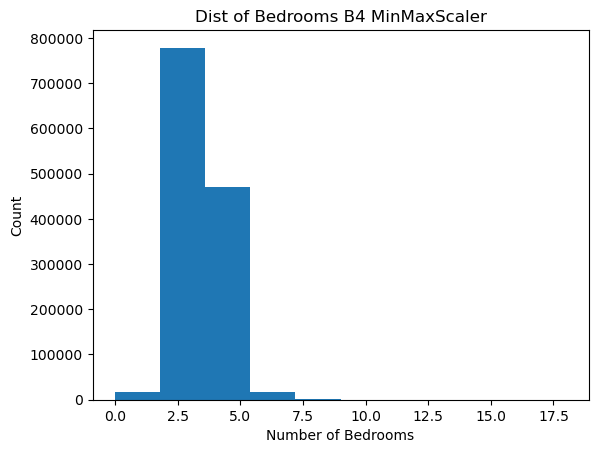

In [14]:
plt.hist(train.bedrooms)
plt.title('Dist of Bedrooms B4 MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

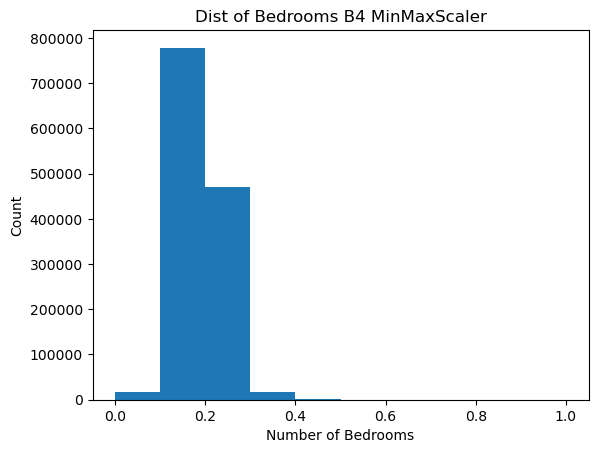

In [15]:
plt.hist(train_scaled.bedrooms)
plt.title('Dist of Bedrooms B4 MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [19]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #establishing a figure object and an array of axis objects
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    #for every row in this subplot, we can associate it with a specific column
    # we link these together with zip
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
        

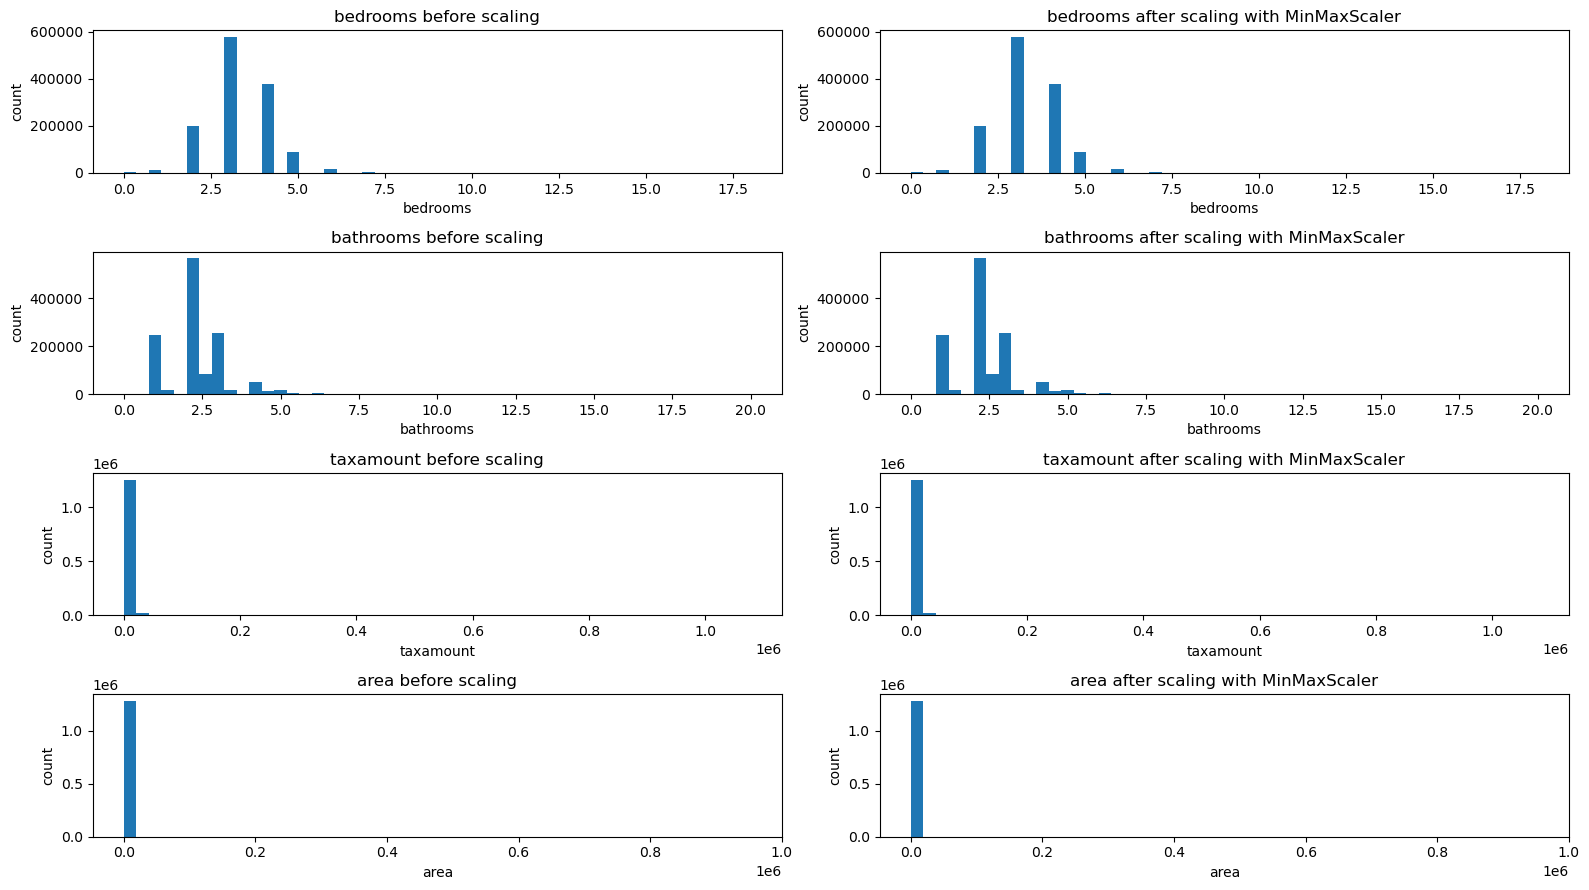

In [20]:
visualize_scaler(scaler=MinMaxScaler(),
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

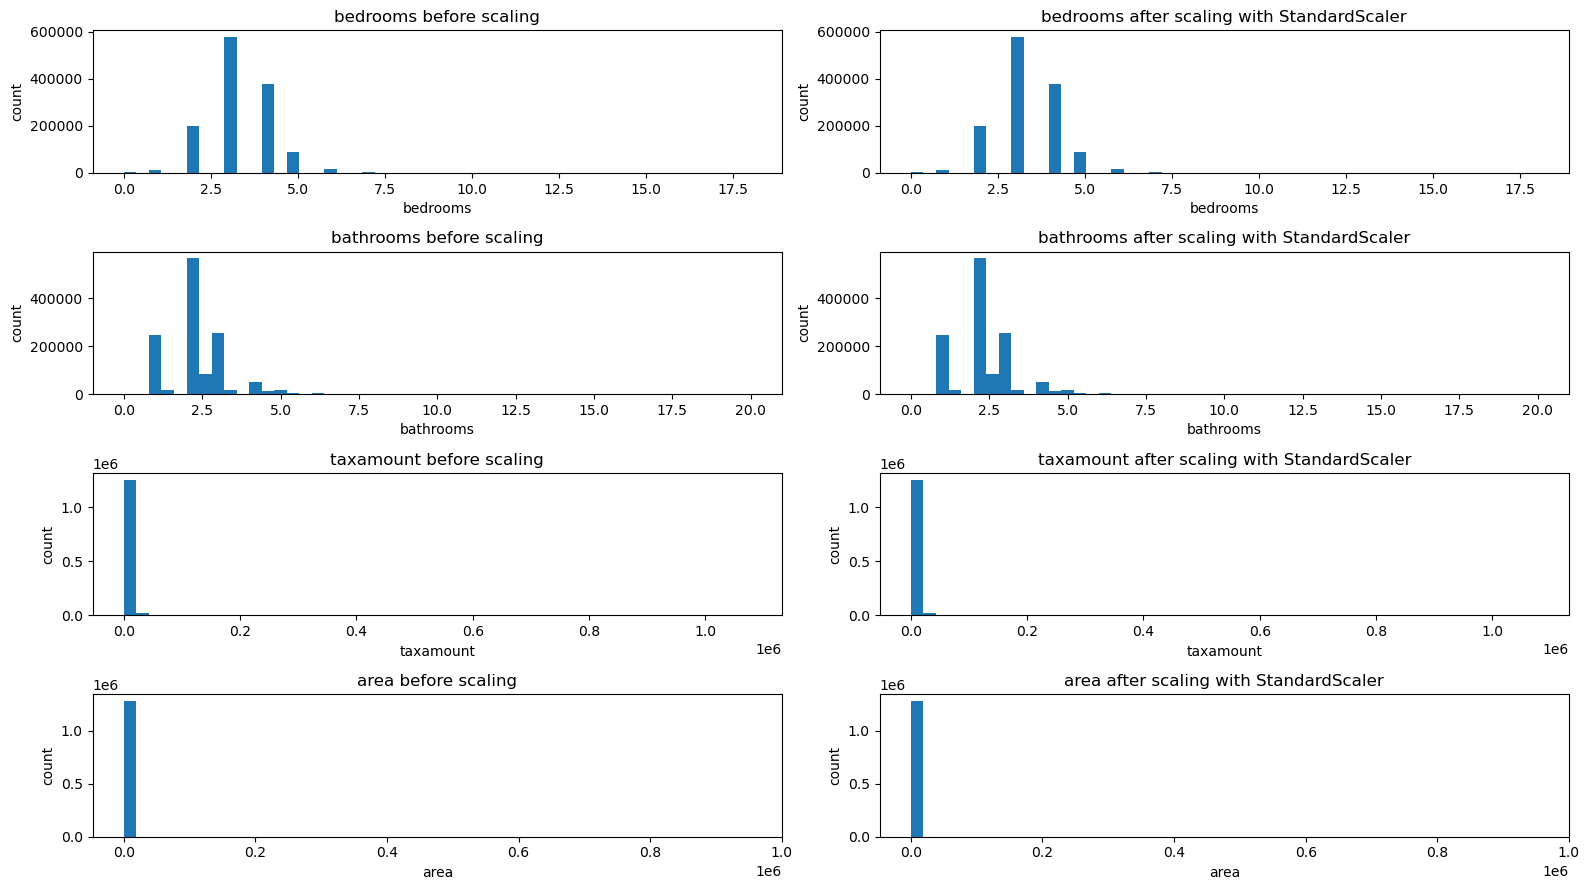

In [21]:
visualize_scaler(scaler=StandardScaler(),
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

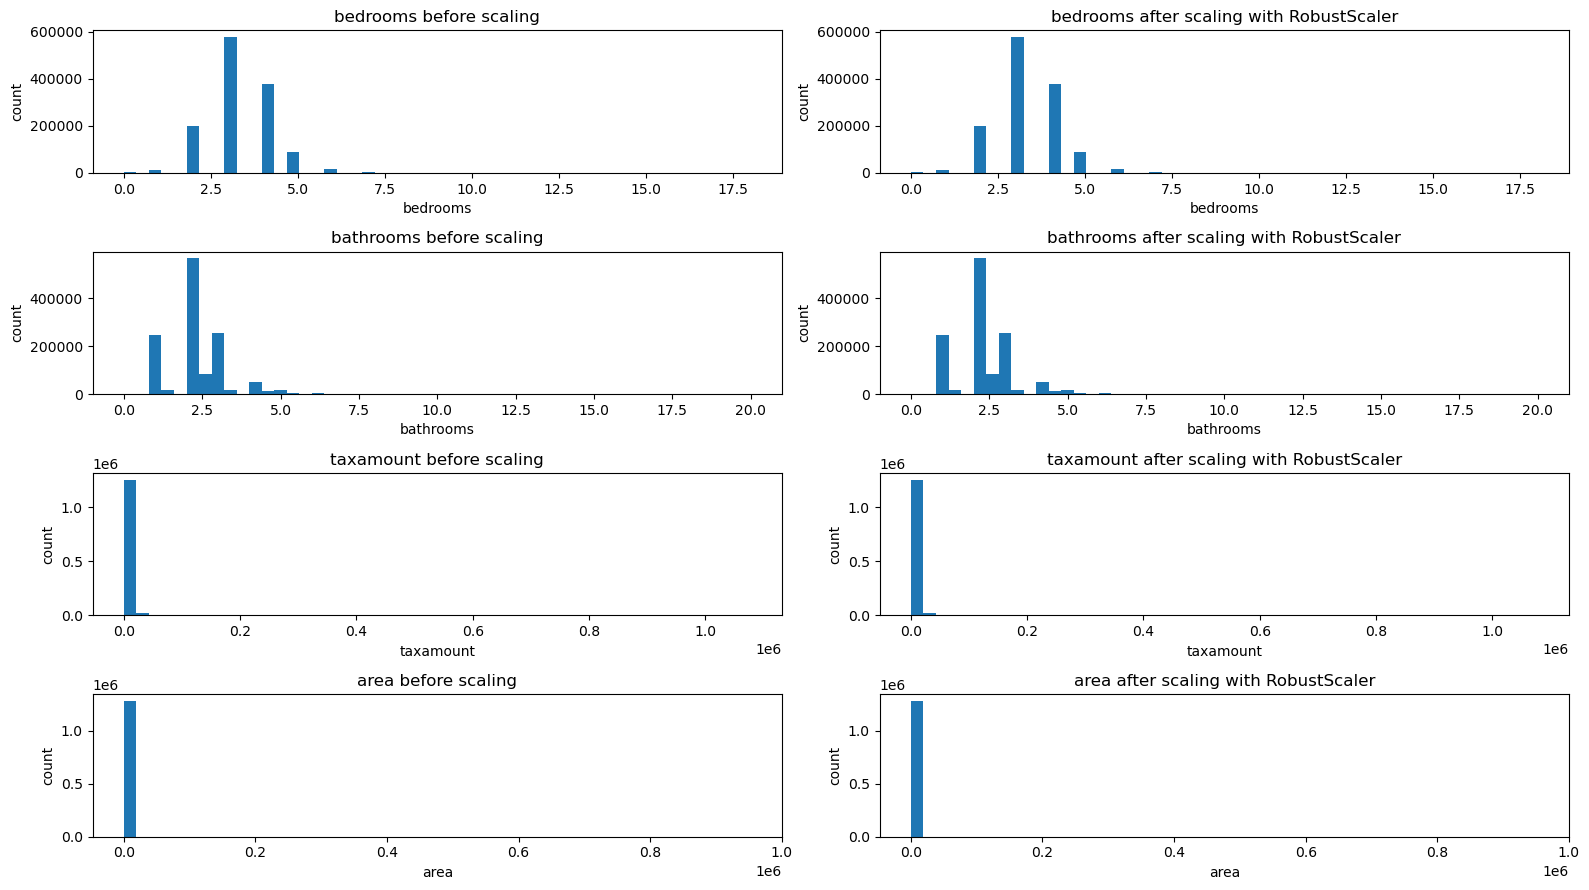

In [22]:
visualize_scaler(scaler=RobustScaler(),
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

In [23]:
scaler = MinMaxScaler()
original_data = train[['taxamount']]
scaled_data = scaler.fit_transform(original_data)

In [24]:
scaled_data[:5]

array([[0.00195434],
       [0.00454149],
       [0.00680725],
       [0.00305891],
       [0.00379896]])

In [26]:
original_data[:5]

,taxamount
760406,2113.31
1702166,4902.50
2124078,7345.21
627151,3304.14
718907,4101.98


In [27]:
scaler.inverse_transform(scaled_data)[:5]

array([[2113.31],
       [4902.5 ],
       [7345.21],
       [3304.14],
       [4101.98]])

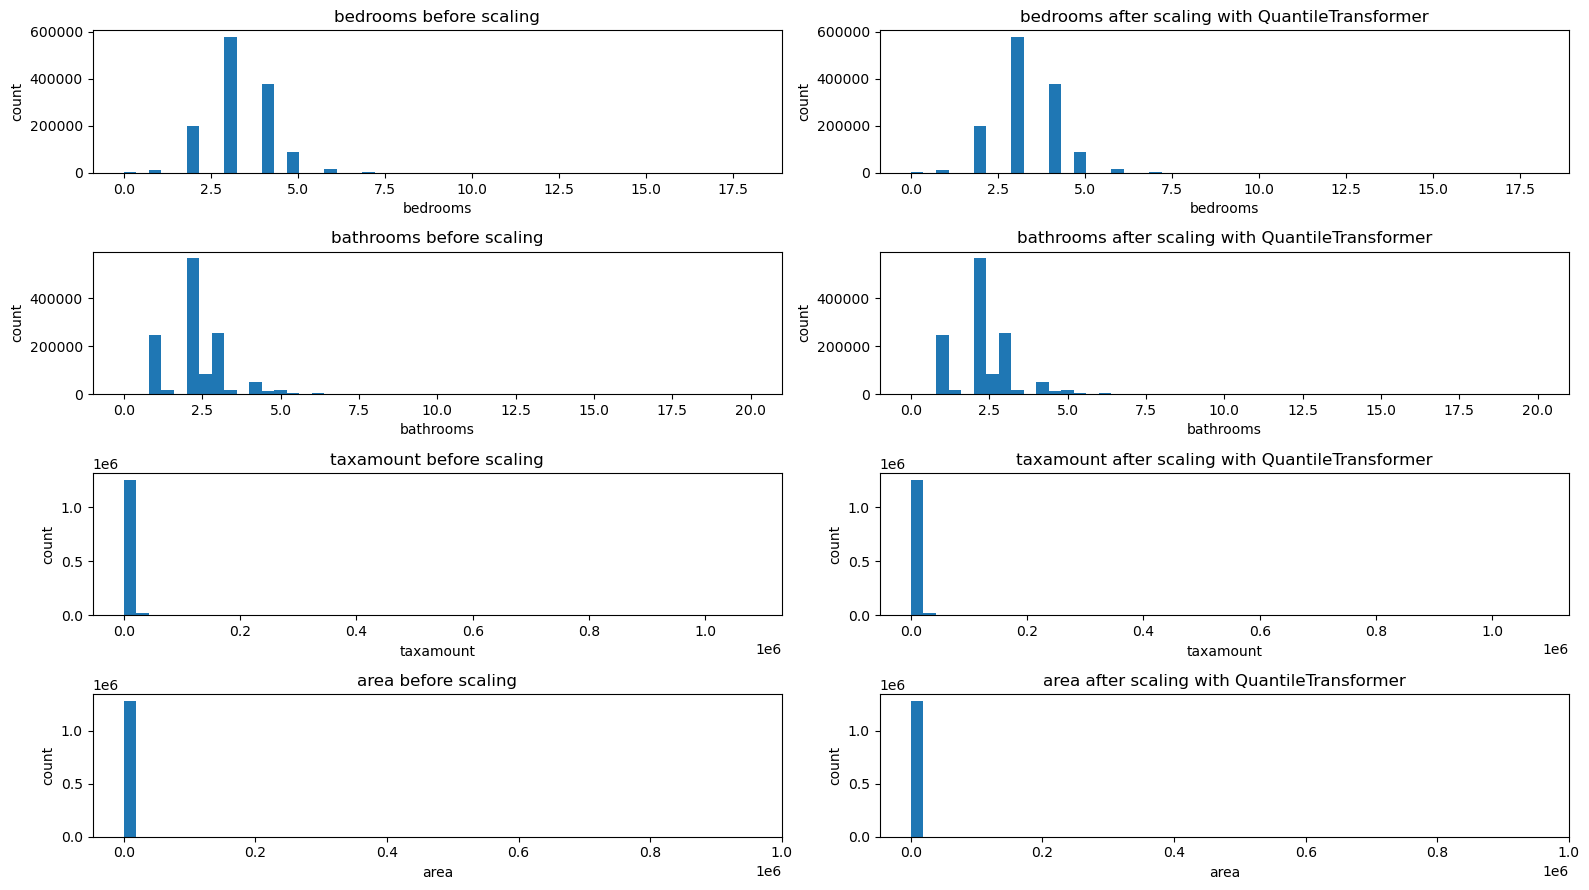

In [29]:
visualize_scaler(scaler=QuantileTransformer(output_distribution='uniform'),
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)